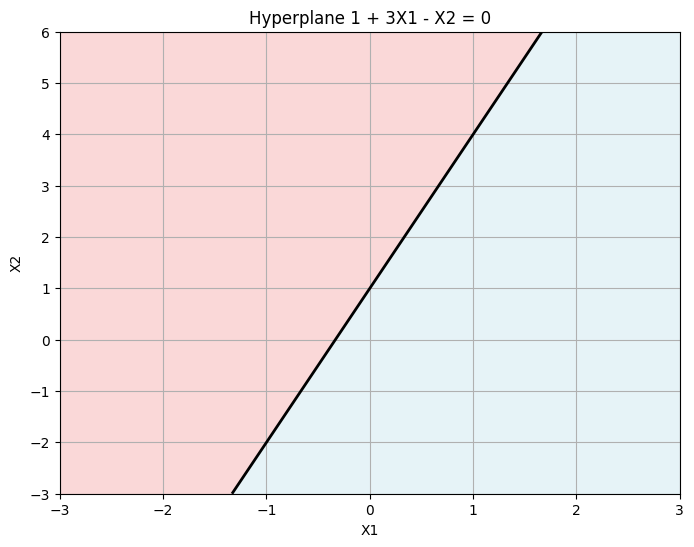

In [17]:
# chapter 9 q1 (a) — plot hyperplane 1 + 3X1 - X2 = 0
import numpy as np
import matplotlib.pyplot as plt

# Create grid for plotting regions
x1 = np.linspace(-3, 3, 400)
x2 = np.linspace(-3, 6, 400)
X1, X2 = np.meshgrid(x1, x2)

# Equation: f(x1, x2) = 1 + 3X1 - X2
f = 1 + 3 * X1 - X2

# Plot
plt.figure(figsize=(8, 6))

# Region where f > 0 (shade lightly)
plt.contourf(X1, X2, f, levels=[0, 100], alpha=0.3, colors=['lightblue'])

# Region where f < 0
plt.contourf(X1, X2, f, levels=[-100, 0], alpha=0.3, colors=['lightcoral'])

# Draw the hyperplane (boundary f = 0)
plt.contour(X1, X2, f, levels=[0], colors='black', linewidths=2)

# Labels
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Hyperplane 1 + 3X1 - X2 = 0")

# Limit range
plt.xlim(-3, 3)
plt.ylim(-3, 6)

plt.grid(True)
plt.show()


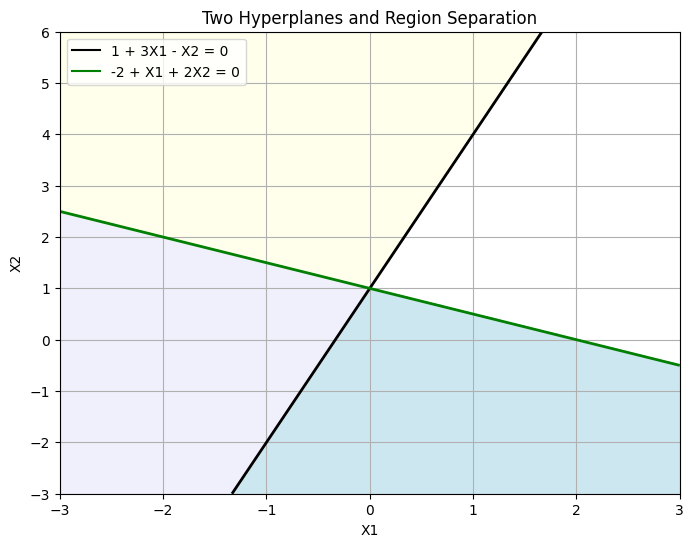

In [18]:
# chapter 9 q1 (b) — plot two hyperplanes and regions
from matplotlib.colors import ListedColormap

# Create grid for the 2D space
x1 = np.linspace(-3, 3, 400)
x2 = np.linspace(-3, 6, 400)
X1, X2 = np.meshgrid(x1, x2)

# Define the two hyperplane functions
f1 = 1 + 3 * X1 - X2            # Hyperplane 1: 1 + 3X1 - X2 = 0
f2 = -2 + X1 + 2 * X2           # Hyperplane 2: -2 + X1 + 2X2 = 0

# Assign regions based on the signs of f1 and f2
regions = np.zeros_like(f1)
regions[(f1 > 0) & (f2 > 0)] = 1  # Region 1
regions[(f1 > 0) & (f2 < 0)] = 2  # Region 2
regions[(f1 < 0) & (f2 > 0)] = 3  # Region 3
regions[(f1 < 0) & (f2 < 0)] = 4  # Region 4

# Create a colormap using named colors
cmap = ListedColormap([
    "white",       # background (unused)
    "lightblue",   # region 1
    "lightcoral",  # region 2
    "lightyellow", # region 3
    "lavender"     # region 4
])

# Plot the regions
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, regions, levels=[0,1,2,3,4], alpha=0.6, cmap=cmap)

# Plot the two hyperplanes (boundary lines)
CS1 = plt.contour(X1, X2, f1, levels=[0], colors='black', linewidths=2)
CS2 = plt.contour(X1, X2, f2, levels=[0], colors='green', linewidths=2)

# Add legend entries using dummy plot lines (most compatible way)
plt.plot([], [], color="black", label="1 + 3X1 - X2 = 0")
plt.plot([], [], color="green", label="-2 + X1 + 2X2 = 0")
plt.legend(loc="upper left")

# Labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Two Hyperplanes and Region Separation')

plt.xlim(-3, 3)
plt.ylim(-3, 6)
plt.grid(True)

plt.show()


In [19]:
# chapter 9 q5(a) — generate synthetic data with quadratic decision boundary

# Set random seed for reproducibility
rng = np.random.default_rng(5)

# Number of observations and number of features
n = 500

# Generate two features X1 and X2 ~ Uniform(-0.5, 0.5)
x1 = rng.uniform(size=n) - 0.5
x2 = rng.uniform(size=n) - 0.5

# Stack features into a single matrix X of shape (n, 2)
X = np.column_stack((x1, x2))

# Generate class labels using a quadratic decision boundary
# y is True/False; we convert to integers 0/1 for later models
y = (x1**2 - x2**2 > 0).astype(int)

print("X shape:", X.shape)   # (500, 2)
print("y shape:", y.shape)   # (500,)
print("Class counts:", np.bincount(y))


X shape: (500, 2)
y shape: (500,)
Class counts: [247 253]


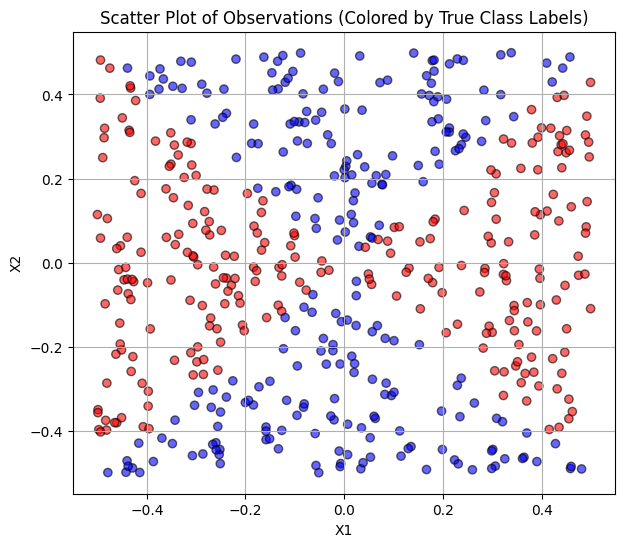

In [20]:
# chapter 9 q5(b) — plot observations colored by class labels

# X1 = first column, X2 = second column
X1 = X[:, 0]
X2 = X[:, 1]

plt.figure(figsize=(7, 6))

# Scatter plot colored by true class labels
plt.scatter(X1, X2, c=y, cmap="bwr", alpha=0.6, edgecolor='k')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter Plot of Observations (Colored by True Class Labels)")

plt.grid(True)
plt.show()


In [21]:
# chapter 9 q5(c) — fit logistic regression with X1 and X2

from sklearn.linear_model import LogisticRegression

# X and y are from part (a)
# X.shape = (500, 2), y.shape = (500,)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Fit the model on the data
log_reg.fit(X, y)

# Print coefficients and intercept
print("Intercept (beta_0):", log_reg.intercept_)
print("Coefficients (beta_1, beta_2):", log_reg.coef_)


Intercept (beta_0): [0.02220278]
Coefficients (beta_1, beta_2): [[-0.15143042  0.08184281]]


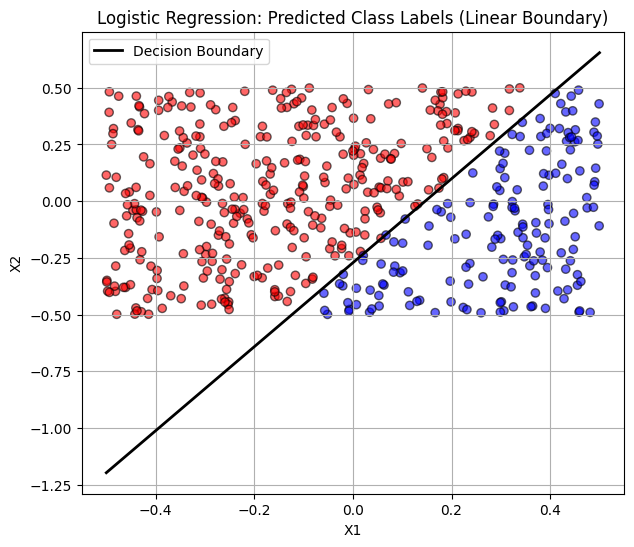

In [22]:
# chapter 9 q5(d) — plot observations colored by predicted logistic regression labels

# Predict class labels for all training observations
y_pred = log_reg.predict(X)

# Extract X1 and X2
X1 = X[:, 0]
X2 = X[:, 1]

plt.figure(figsize=(7, 6))

# Scatter plot colored by predicted class labels
plt.scatter(X1, X2, c=y_pred, cmap="bwr", alpha=0.6, edgecolor='k')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Logistic Regression: Predicted Class Labels (Linear Boundary)")

plt.grid(True)

# ---- Plot logistic regression decision boundary ----

# Decision boundary satisfies: beta0 + beta1*x1 + beta2*x2 = 0
# Solve for x2: x2 = -(beta0 + beta1*x1) / beta2

beta0 = log_reg.intercept_[0]
beta1 = log_reg.coef_[0][0]
beta2 = log_reg.coef_[0][1]

# Create a range of x1 values
x1_vals = np.linspace(-0.5, 0.5, 200)
# Compute corresponding x2 values
x2_vals = -(beta0 + beta1 * x1_vals) / beta2

# Plot the decision boundary
plt.plot(x1_vals, x2_vals, color='black', linewidth=2, label="Decision Boundary")

plt.legend()
plt.show()


In [23]:
# chapter 9 q5(e) — logistic regression using nonlinear transformations

# Original features
X1 = X[:, 0]
X2 = X[:, 1]

# Create nonlinear features
X_nl = np.column_stack([
    X1,             # linear
    X2,             # linear
    X1**2,          # quadratic
    X2**2,          # quadratic
    X1 * X2         # interaction
])

# Fit logistic regression on nonlinear features
log_reg_nl = LogisticRegression(max_iter=1000)
log_reg_nl.fit(X_nl, y)

print("Intercept:", log_reg_nl.intercept_)
print("Coefficients:", log_reg_nl.coef_)


Intercept: [0.07702485]
Coefficients: [[-0.15402459  0.03730922  6.07637484 -6.68310833 -0.11601287]]


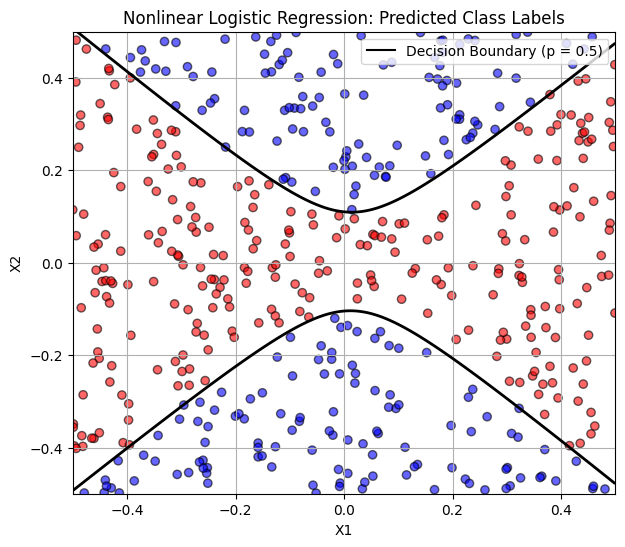

In [24]:
# chapter 9 q5(f) — plot nonlinear logistic regression decision boundary

import numpy as np
import matplotlib.pyplot as plt

# 1. Predicted labels for each training observation (using nonlinear model)
y_pred_nl = log_reg_nl.predict(X_nl)

# 2. Scatter plot colored by predicted labels
X1 = X[:, 0]
X2 = X[:, 1]

plt.figure(figsize=(7, 6))
plt.scatter(X1, X2, c=y_pred_nl, cmap="bwr", alpha=0.6, edgecolor='k')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Nonlinear Logistic Regression: Predicted Class Labels")
plt.grid(True)

# 3. Create a grid over the feature space to draw the decision boundary
grid_x1 = np.linspace(-0.5, 0.5, 300)
grid_x2 = np.linspace(-0.5, 0.5, 300)
GX1, GX2 = np.meshgrid(grid_x1, grid_x2)

# Build nonlinear grid features (same structure as X_nl)
GX1_flat = GX1.ravel()
GX2_flat = GX2.ravel()

grid_features_nl = np.column_stack([
    GX1_flat,
    GX2_flat,
    GX1_flat**2,
    GX2_flat**2,
    GX1_flat * GX2_flat
])

# 4. Predict class probabilities on the grid
probs_grid = log_reg_nl.predict_proba(grid_features_nl)[:, 1]
probs_grid = probs_grid.reshape(GX1.shape)

# 5. Draw the 0.5 contour as the nonlinear decision boundary
plt.contour(GX1, GX2, probs_grid, levels=[0.5], colors="black", linewidths=2)

# Add legend using dummy line
plt.plot([], [], color="black", label="Decision Boundary (p = 0.5)")
plt.legend()

plt.show()


Unique predicted labels: [0 1]


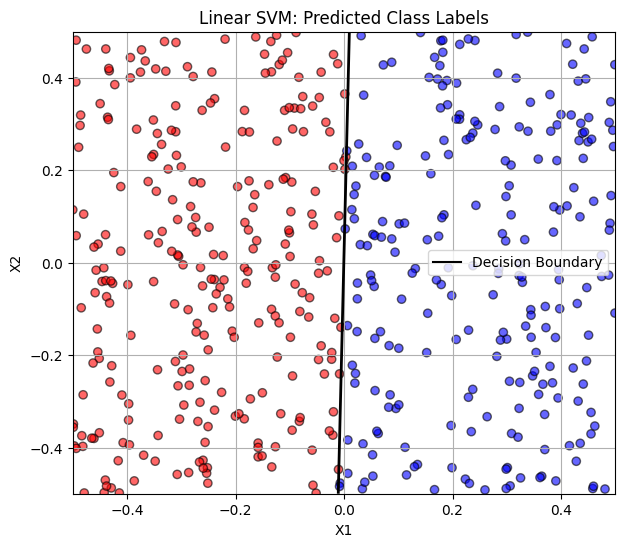

In [25]:
from sklearn.svm import SVC

# Try a larger C so the SVM boundary is not too far away
svm_lin = SVC(kernel="linear", C=10)
svm_lin.fit(X, y)

y_pred_svm_lin = svm_lin.predict(X)

import numpy as np
print("Unique predicted labels:", np.unique(y_pred_svm_lin))

# chapter 9 q5(g) — linear SVM with decision_function contour

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Fit linear SVM with a larger C
svm_lin = SVC(kernel="linear", C=10)
svm_lin.fit(X, y)

# 2. Predict class labels
y_pred_svm_lin = svm_lin.predict(X)

# 3. Scatter plot of predicted labels
X1 = X[:, 0]
X2 = X[:, 1]

plt.figure(figsize=(7, 6))
plt.scatter(X1, X2, c=y_pred_svm_lin, cmap="bwr", alpha=0.6, edgecolor="k")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Linear SVM: Predicted Class Labels")
plt.grid(True)

# 4. Create grid over feature space
grid_x1 = np.linspace(-0.5, 0.5, 300)
grid_x2 = np.linspace(-0.5, 0.5, 300)
GX1, GX2 = np.meshgrid(grid_x1, grid_x2)

grid_points = np.column_stack([GX1.ravel(), GX2.ravel()])

# 5. Compute decision function on the grid
Z = svm_lin.decision_function(grid_points)
Z = Z.reshape(GX1.shape)

# 6. Plot the decision boundary where decision_function = 0
plt.contour(GX1, GX2, Z, levels=[0], colors="black", linewidths=2)
plt.plot([], [], color="black", label="Decision Boundary")

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.legend()
plt.show()


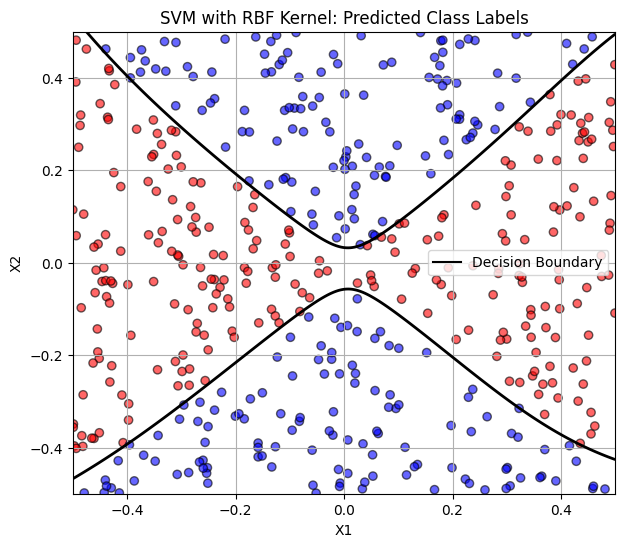

In [26]:
# chapter 9 q5(h) — SVM with nonlinear (RBF) kernel

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Fit an SVM with RBF kernel
svm_rbf = SVC(kernel="rbf", gamma="scale")
svm_rbf.fit(X, y)

# 2. Predict class labels for the training data
y_pred_rbf = svm_rbf.predict(X)

# 3. Scatter plot of predicted class labels
X1 = X[:, 0]
X2 = X[:, 1]

plt.figure(figsize=(7, 6))
plt.scatter(X1, X2, c=y_pred_rbf, cmap="bwr", alpha=0.6, edgecolor="k")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM with RBF Kernel: Predicted Class Labels")
plt.grid(True)

# 4. Create a grid
grid_x1 = np.linspace(-0.5, 0.5, 300)
grid_x2 = np.linspace(-0.5, 0.5, 300)
GX1, GX2 = np.meshgrid(grid_x1, grid_x2)

grid_points = np.column_stack([GX1.ravel(), GX2.ravel()])

# 5. Compute decision function on the grid
Z = svm_rbf.decision_function(grid_points)
Z = Z.reshape(GX1.shape)

# 6. Plot the nonlinear decision boundary (where decision_function = 0)
plt.contour(GX1, GX2, Z, levels=[0], colors="black", linewidths=2)
plt.plot([], [], color="black", label="Decision Boundary")

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.legend()
plt.show()


## chapter 9 q5(i)
Overall, the comparison shows that linear models (logistic regression and linear SVM) are unable to capture the nonlinear quadratic structure in the data and therefore perform poorly. Adding nonlinear transformations or using an RBF-kernel SVM allows the model to recover the curved decision boundary and dramatically improves classification performance. The RBF SVM provides the best fit among all methods.

## chapter 10 q2(a)
Original softmax definition:

$$
f_m(X) = \frac{e^{z_m}}{\sum_{\ell=0}^9 e^{z_\ell}}.
$$

Add a constant \(c\) to every logit:

$$
z_\ell' = z_\ell + c.
$$

The new softmax probability becomes:

$$
f_m'(X)
= \frac{e^{z_m'}}{\sum_{\ell=0}^9 e^{z_\ell'}}
= \frac{e^{z_m + c}}{\sum_{\ell=0}^9 e^{z_\ell + c}}.
$$

Factor out the constant \(c\):

$$
f_m'(X)
= \frac{e^{c} e^{z_m}}{\sum_{\ell=0}^9 e^{c} e^{z_\ell}}
= \frac{e^{c} e^{z_m}}{e^{c} \sum_{\ell=0}^9 e^{z_\ell}}.
$$

Cancel ${e^{c}}$ from numerator and denominator:

$$
f_m'(X)
= \frac{e^{z_m}}{\sum_{\ell=0}^9 e^{z_\ell}}
= f_m(X).
$$

Therefore, adding the same constant \(c\) to all logits ${z_\ell}$ does *not* change the softmax probabilities.


**Softmax probabilities do not change when all logits are shifted by the same constant.**

## chapter 10 q2(b)
For the multinomial logistic regression in (4.13), we have

$$
\Pr(Y = k \mid X = x)
= \frac{\exp\big(\beta_{k0} + \beta_{k1} x_1 + \cdots + \beta_{kp} x_p\big)}
       {\sum_{\ell=1}^K \exp\big(\beta_{\ell 0} + \beta_{\ell 1} x_1 + \cdots + \beta_{\ell p} x_p\big)}.
$$

Define the logit for class ${k}$ as

$$
z_k(x) = \beta_{k0} + \beta_{k1} x_1 + \cdots + \beta_{kp} x_p.
$$

Now add constants ${c_j}$, ${j = 0,\dots,p}$, to the corresponding coefficients for
each class:

$$
\beta'_{kj} = \beta_{kj} + c_j \quad \text{for all } k.
$$

The new logits become

$$
\begin{aligned}
z_k'(x)
&= \sum_{j=0}^p \beta'_{kj} x_j \quad (x_0 = 1) \\
&= \sum_{j=0}^p (\beta_{kj} + c_j) x_j \\
&= \sum_{j=0}^p \beta_{kj} x_j + \sum_{j=0}^p c_j x_j \\
&= z_k(x) + C(x),
\end{aligned}
$$

where

$$
C(x) = \sum_{j=0}^p c_j x_j
$$

does not depend on ${k}$.

Therefore all class logits have been shifted by the **same constant** ${C(x)}$.
The new softmax probabilities are

$$
\Pr'(Y = k \mid X = x)
= \frac{e^{z_k'(x)}}{\sum_{\ell=1}^K e^{z_\ell'(x)}}
= \frac{e^{z_k(x) + C(x)}}{\sum_{\ell=1}^K e^{z_\ell(x) + C(x)}}.
$$

Factoring out ${e^{C(x)}}$ from numerator and denominator gives

$$
\Pr'(Y = k \mid X = x)
= \frac{e^{C(x)} e^{z_k(x)}}{e^{C(x)} \sum_{\ell=1}^K e^{z_\ell(x)}}
= \frac{e^{z_k(x)}}{\sum_{\ell=1}^K e^{z_\ell(x)}}
= \Pr(Y = k \mid X = x).
$$

Hence, adding constants ${c_j}$ to the corresponding coefficients of every class
does not change the softmax probabilities, and therefore the predicted class at
any new point ${x}$ is unchanged.


## Overall Conclusion

Both parts (a) and (b) show that:

> The softmax function is over-parameterized.

> Multiple different parameter sets ${β_{kj}}$ lead to the exact same probability predictions.

Regularization and SGD implicitly select one valid solution, so this redundancy does not cause practical problems.
